Original Sudoku:
5 3 . . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


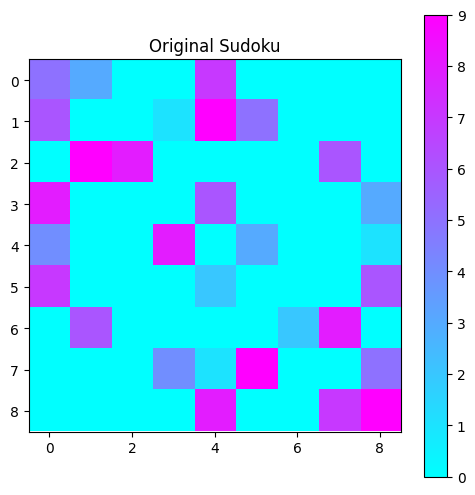


Solved Sudoku:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


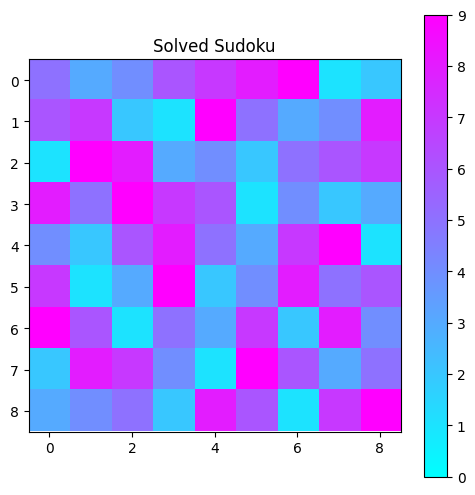

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to check if a number can be placed in a specific cell
def is_valid(board, row, col, num):
    # Check row
    if num in board[row]:
        return False
    # Check column
    if num in [board[r][col] for r in range(9)]:
        return False
    # Check 3x3 subgrid
    start_row, start_col = (row // 3) * 3, (col // 3) * 3
    for r in range(start_row, start_row + 3):
        for c in range(start_col, start_col + 3):
            if board[r][c] == num:
                return False
    return True

# Function to solve the Sudoku puzzle using backtracking
def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:  # Empty cell
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0  # Backtrack if the number is incorrect
                return False  # No valid number found, backtrack
    return True

# Function to print the Sudoku board in console
def print_board(board):
    for row in board:
        print(" ".join(str(num) if num != 0 else '.' for num in row))

# Function to visualize the Sudoku board using matplotlib
def plot_sudoku(board, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(np.array(board), cmap="cool", vmin=0, vmax=9)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Sample Sudoku puzzle (0 represents empty cells)
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Original Sudoku:")
print_board(board)
plot_sudoku(board, "Original Sudoku")

# Solve the Sudoku puzzle and display the result
if solve_sudoku(board):
    print("\nSolved Sudoku:")
    print_board(board)
    plot_sudoku(board, "Solved Sudoku")
else:
    print("\nNo solution exists")
